In [1]:
import os
import os.path
import numpy as np
import shutil

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [2]:
# Define which folders to parse:
# root_dir='/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle_collision_free'
root_dir='/esat/opal/kkelchte/docker_home/pilot_data/'

data_dirs=sorted([d for d in os.listdir(root_dir) if d.startswith('rec')])
# data_dirs=sorted([d for d in os.listdir(root_dir) if os.path.isdir(root_dir+'/'+d)])

print("cleaning up "+str(len(data_dirs))+" folders:")
print data_dirs

cleaning up 10 folders:
['rec_1', 'rec_10', 'rec_2', 'rec_3', 'rec_4', 'rec_5', 'rec_6', 'rec_7', 'rec_8', 'rec_9']


Printing stats: 

/esat/opal/kkelchte/docker_home/pilot_data//rec_1/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data//rec_1/00001_canyon
/esat/opal/kkelchte/docker_home/pilot_data//rec_1/00002_canyon
/esat/opal/kkelchte/docker_home/pilot_data//rec_1/00003_canyon
/esat/opal/kkelchte/docker_home/pilot_data//rec_1/00004_canyon
/esat/opal/kkelchte/docker_home/pilot_data//rec_1/00005_canyon
/esat/opal/kkelchte/docker_home/pilot_data//rec_1/00006_canyon
/esat/opal/kkelchte/docker_home/pilot_data//rec_1/00007_canyon
/esat/opal/kkelchte/docker_home/pilot_data//rec_1/00008_canyon
/esat/opal/kkelchte/docker_home/pilot_data//rec_1/00009_canyon
/esat/opal/kkelchte/docker_home/pilot_data//rec_10/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data//rec_10/00001_canyon
/esat/opal/kkelchte/docker_home/pilot_data//rec_10/00002_canyon
/esat/opal/kkelchte/docker_home/pilot_data//rec_10/00003_canyon
/esat/opal/kkelchte/docker_home/pilot_data//rec_10/00004_canyon
/esat/opal/kkelchte/docker_home/

/users/visics/kkelchte/tensorflow/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


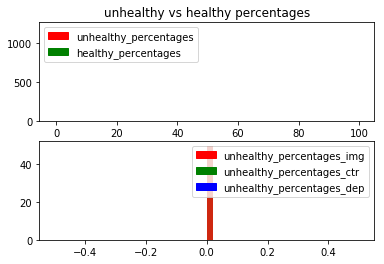

In [3]:
print("Printing stats: \n")
healthy_percentages=[]
unhealthy_percentages=[]
unhealthy_percentages_ctr=[]
unhealthy_percentages_img=[]
unhealthy_percentages_dep=[]

all_healthy=0
all_unhealthy=0

for d in data_dirs:
    healthy=[]
    unhealthy=[]
    runs=sorted([root_dir+'/'+d+'/'+r for r in os.listdir(root_dir+'/'+d) if r.startswith('00')])
    for r in runs:
        print r
        # check control and see from which image control is different than zero to get starting frame
        try:
            ctr_file=open(r+'/control_info.txt')
        except:
            unhealthy.append({'name':r,
                             'reason':'no control'})
            print 'untheatlhy: ',unhealthy[-1]['reason']
        else:
            ctr_lines=ctr_file.readlines()
            ctrs=[int(l.split(' ')[0]) for l in ctr_lines if float(l.split(' ')[1])!=0]
            if len(ctrs) == 0:
                unhealthy.append({'name':r,
                                 'reason':'no control'})
                print 'untheatlhy: ',unhealthy[-1]['reason']
                break
                
            # remove unnecessary RGB and depth images for which there is no control
#             remove_images=[r+'/RGB'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] 
#             remove_depths=[r+'/Depth'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] 
            images=[r+'/RGB'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            depths=[r+'/Depth'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            if len(images) < 10:
                unhealthy.append({'name':r,
                                 'reason':'few images'})
                print 'untheatlhy: ',unhealthy[-1]['reason']
            elif len(depths) < 10:
                unhealthy.append({'name':r,
                                 'reason':'few depth'})
                print 'untheatlhy: ',unhealthy[-1]['reason']
            else:
                healthy.append({'name':r})

    
    healthy_percentages.append(100.*len(healthy)/(0.01+len(healthy)+len(unhealthy)))
    unhealthy_percentages.append(100.*len(unhealthy)/(0.01+len(healthy)+len(unhealthy)))
    unhealthy_percentages_img.append(100.*len([u for u in unhealthy if u['reason']=='few images'])/(0.01+len(unhealthy)))
    unhealthy_percentages_dep.append(100.*len([u for u in unhealthy if u['reason']=='few depth'])/(0.01+len(unhealthy)))
    unhealthy_percentages_ctr.append(100.*len([u for u in unhealthy if u['reason']=='no control'])/(0.01+len(unhealthy)))
    
    all_healthy+=len(healthy)
    all_unhealthy+=len(unhealthy)
#     print("{0} has {1} healthy and {2} unhealthy runs. \n \t {3:.1f} % lack of images \n \t {4:.1f}% lack of depth \n \t {5:.1f}% lack of control.".format(d,
#     len(healthy), 
#     len(unhealthy), 
#     100.*len([u for u in unhealthy if u['reason']=='few images'])/(0.01+len(unhealthy)), 
#     100.*len([u for u in unhealthy if u['reason']=='few depth'])/(0.01+len(unhealthy)),
#     100.*len([u for u in unhealthy if u['reason']=='no control'])/(0.01+len(unhealthy))))

# 
print("Total number of healthy runs: {0}, unhealthy runs: {1}".format(all_healthy, all_unhealthy))
# healthy runs:
plt.subplot(211)
plt.hist(healthy_percentages, 50, normed=1, facecolor='green', alpha=0.75)
plt.hist(unhealthy_percentages, 50, normed=1, facecolor='red', alpha=0.75)
plt.title('unhealthy vs healthy percentages')

red_patch = mpatches.Patch(color='red', label='unhealthy_percentages')
green_patch = mpatches.Patch(color='green', label='healthy_percentages')
plt.legend(handles=[red_patch, green_patch])

plt.subplot(212)
plt.hist(unhealthy_percentages_ctr, 50, normed=1, facecolor='green', alpha=0.75)
plt.hist(unhealthy_percentages_img, 50, normed=1, facecolor='red', alpha=0.75)
# n, bins, patches = plt.hist(unhealthy_percentages_dep, 50, normed=1, facecolor='blue', alpha=0.75)
# plt.title('unhealthy due to control (green) vs images (red) in percentages')

green_patch = mpatches.Patch(color='green', label='unhealthy_percentages_ctr')
red_patch = mpatches.Patch(color='red', label='unhealthy_percentages_img')
blue_patch = mpatches.Patch(color='blue', label='unhealthy_percentages_dep')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.show()

In [4]:
# Go through data and remove useless runs:
for d in data_dirs:
    runs=sorted([root_dir+'/'+d+'/'+r for r in os.listdir(root_dir+'/'+d) if r.startswith('0')])
    for r in runs:
        print r
        # check control and see from which image control is different than zero to get starting frame
        try:
            ctr_file=open(r+'/control_info.txt')
        except:
            print('delete.')
            shutil.rmtree(r)
        else:
            ctr_lines=ctr_file.readlines()
            ctrs=[int(l.split(' ')[0]) for l in ctr_lines if float(l.split(' ')[1])!=0]
            if len(ctrs) == 0:
                print('delete.')
                shutil.rmtree(r)
                break 
            images=[r+'/RGB'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            depths=[r+'/Depth'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            if len(images) < 10: 
                print('delete.')
                shutil.rmtree(r)
            elif len(depths) < 10: 
                print('delete.')
                shutil.rmtree(r)
            else:
                # cleanup useless images
                remove_images=sorted([r+'/RGB/'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] )
                remove_depths=sorted([r+'/Depth/'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] )
#                 print sorted(remove_images)
#                 print sorted(remove_depths)
#                 import pdb;pdb.set_trace()
                for f in remove_images: os.remove(f)
                for f in remove_depths: os.remove(f)

/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00001_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00002_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00003_canyon
delete.
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00004_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00005_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00006_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00007_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00008_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00009_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00010_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00011_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00012_canyon
delete.
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00013_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00014_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00015

/esat/opal/kkelchte/docker_home/pilot_data/rec_4/00003_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_4/00004_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_4/00005_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_4/00006_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_4/00007_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_4/00008_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_4/00009_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_4/00010_canyon
delete.
/esat/opal/kkelchte/docker_home/pilot_data/rec_4/00011_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_4/00012_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_4/00013_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_4/00014_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_4/00015_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_4/00016_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_4/00017_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_4/00018_canyon


/esat/opal/kkelchte/docker_home/pilot_data/rec_7/00057_canyon
delete.
/esat/opal/kkelchte/docker_home/pilot_data/rec_7/00058_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_7/00059_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_7/00060_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_7/00061_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_7/00062_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_7/00063_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_7/00064_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_7/00065_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_7/00066_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_7/00067_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_7/00068_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_7/00069_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_7/00070_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_7/00071_canyon
delete.
/esat/opal/kkelchte/docker_home/pilot_data/rec_7/00072

In [5]:
# make a final check on current data: --> in case there are still unhealthy runs rerun previous window a few times...
all_healthy=0
all_unhealthy=0

for d in data_dirs:
    healthy=[]
    unhealthy=[]
    runs=sorted([root_dir+'/'+d+'/'+r for r in os.listdir(root_dir+'/'+d) if r.startswith('00')])
    for r in runs:
#         print r
        # check control and see from which image control is different than zero to get starting frame
        try:
            ctr_file=open(r+'/control_info.txt')
        except:
            unhealthy.append({'name':r,
                             'reason':'no control'})
        else:
            ctr_lines=ctr_file.readlines()
            ctrs=[int(l.split(' ')[0]) for l in ctr_lines if float(l.split(' ')[1])!=0]
            if len(ctrs) == 0:
                unhealthy.append({'name':r,
                                 'reason':'no control'})
                break
                
            # remove unnecessary RGB and depth images for which there is no control
#             remove_images=[r+'/RGB'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] 
#             remove_depths=[r+'/Depth'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] 
            images=[r+'/RGB'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            depths=[r+'/Depth'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            if len(images) < 10:
                unhealthy.append({'name':r,
                                 'reason':'few images'})
            elif len(depths) < 10:
                unhealthy.append({'name':r,
                                 'reason':'few depth'})
            else:
                healthy.append({'name':r})
    print("{0} has {1} healthy and {2} unhealthy runs. \n \t {3:.1f} % lack of images \n \t {4:.1f}% lack of depth \n \t {5:.1f}% lack of control.".format(d,
    len(healthy), 
    len(unhealthy), 
    100.*len([u for u in unhealthy if u['reason']=='few images'])/(0.01+len(unhealthy)), 
    100.*len([u for u in unhealthy if u['reason']=='few depth'])/(0.01+len(unhealthy)),
    100.*len([u for u in unhealthy if u['reason']=='no control'])/(0.01+len(unhealthy))))
    all_healthy+=len(healthy)
    all_unhealthy+=len(unhealthy)
print("Total number of healthy runs: {0}, unhealthy runs: {1}".format(all_healthy, all_unhealthy))


rec_1 has 96 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_10 has 98 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_4 has 84 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_5 has 88 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_7 has 92 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
rec_8 has 92 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
Total number of healthy runs: 550, unhealthy runs: 0


In [10]:
for n in [7,5,3] :
    runs=sorted([root_dir+'/'+d for d in data_dirs])
    for r in runs:
        print r
        collision_filename='collision_info_'+str(n)+'.txt'
        collision_file=open(r+'/'+collision_filename,'w')
        images=sorted([int(im.split('.')[0]) for im in os.listdir(r+'/RGB')])
        print images
        collision_labels={im:0 if im in images[:-n] else 1 for im in images}
        for k in sorted(collision_labels.keys()): 
    #         print("{0:010d} {1}\n".format(k, collision_labels[k]))
            collision_file.write("{0:010d} {1}\n".format(k, collision_labels[k]))
        collision_file.close()
        

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00000_canyon
[6, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259, 261, 263]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00001_canyon
[7, 8, 11, 12, 15, 16, 18, 21, 22, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 74, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 112, 115, 117, 119, 121, 123, 125, 127, 

[7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 184, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00293_canyon
[6, 8, 11, 13, 15, 17, 19, 20, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163

[7, 8, 10, 13, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 53, 54, 56, 58, 60, 62, 64, 67, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 95, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 119, 120, 122, 124, 126, 129, 130, 132, 134, 136, 138, 140, 143, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 205, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 253, 254, 256, 258, 260, 262, 264, 267, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 301, 302, 304, 307, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 351, 352, 354, 356, 358, 360, 362, 364, 366, 369, 370, 372, 374, 376, 378, 380, 382, 384, 387, 388, 390, 392, 394, 396, 398, 400, 402, 405, 406, 408, 410, 412, 415, 416, 418, 420, 422, 424

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/01039_canyon
[7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 54, 57, 58, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 82, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/01040_canyon
[6, 8, 10, 11, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/01041_canyon
[6, 7, 10, 12, 14, 16, 18, 20, 22, 24, 26, 27, 29, 32, 34, 36, 38, 40, 42, 44, 46]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/01042_canyon
[6, 8, 9, 11, 14, 16, 18, 20, 22, 24, 25, 28, 30, 32, 34, 36, 38, 40, 42, 44]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/01043_canyon
[6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 27, 30]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/01044_canyon
[6, 8, 10, 12, 14, 15, 18, 20, 22, 23, 26, 28, 30, 32, 34, 36, 38, 40, 4

[6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 159, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 193, 196, 198, 200, 202, 204, 205, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00209_canyon
[7, 9, 10, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107]
/esat/opal/kkelchte/docker_home/pilot_data/

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00545_canyon
[7, 8, 10, 12, 14, 16, 18, 20, 22, 25, 26, 28, 30, 33, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 71, 72, 75, 76, 78, 80, 82, 84, 86, 88, 90, 93, 95, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 139, 140, 142, 144, 146, 148, 150, 152, 155, 156, 159, 160, 162, 164, 166, 169, 170, 172, 175, 176, 178, 180, 182, 184, 186, 188, 190, 193, 194, 197, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 225, 226, 228, 230, 232, 234, 236, 238, 241, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 285, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 309, 310, 312, 314]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00546_canyon
[6, 9, 10, 13, 15, 17, 18, 20, 23, 24, 27, 29, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 51, 52, 54, 56, 58, 61, 62, 64, 66, 68, 

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00962_canyon
[6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 57, 60]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00963_canyon
[6, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30, 33, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 57, 59, 62, 64, 66]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00964_canyon
[6, 8, 10, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 36, 39, 40, 42, 44, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00965_canyon
[7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 40]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00966_canyon
[7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 28, 31, 33, 35, 37]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00967_canyon
[7, 8, 11, 13, 15, 17, 19, 21, 22, 25, 27, 29, 31, 33, 3

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00184_canyon
[7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 104, 107, 109, 111, 113, 114, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 182, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00185_canyon
[7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 54, 57, 59, 61, 63, 65, 67, 69, 71, 73]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00186_canyon
[7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61

[6, 8, 10, 12, 14, 16, 19, 20, 22, 25, 27, 28, 30, 33, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 67, 68, 70, 72, 74, 76, 78, 81, 83, 84, 86, 88, 90, 92, 94, 96, 99, 100, 102, 105, 106, 108, 111, 112, 114, 116, 118, 120, 122, 124, 127, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 149, 150, 153, 154, 156, 158, 160, 162, 164, 166, 169, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 191, 192, 194, 196, 198, 201, 202, 204, 206, 209, 211, 212, 214, 216, 218, 221, 223, 225, 227, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 281, 282, 284, 287, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 311, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 343, 344]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00536_canyon
[6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 29, 30, 32, 34, 36, 38, 40, 42, 44, 47, 48, 51, 52, 54, 56]
/esat/opal/kkelchte/do

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00949_canyon
[7, 9, 11, 13, 15, 17, 19, 21, 22, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 70, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 96, 99, 101, 103, 104, 107, 108, 110, 112, 114, 116, 118, 120, 123, 124, 126, 128, 131, 133, 134, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 174, 176, 179, 181, 183, 185, 187, 189, 190, 193, 195, 197]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00950_canyon
[6, 8, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 54, 57]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00951_canyon
[7, 9, 11, 13, 15, 17, 18, 21, 23, 25, 27]
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00952_canyon
[7, 8, 11, 13, 14, 17, 19, 21, 23, 25, 27, 29, 31, 33, 34, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55]
/esat/opal/kkelchte/docker_home

In [6]:
                                                                        # For all remaining runs: create collision labels
for d in data_dirs:
    runs=sorted([root_dir+'/'+d+'/'+r for r in os.listdir(root_dir+'/'+d) if r.startswith('0')])
    for r in runs:
        print r
        collision_file=open(r+'/collision_info.txt','w')
        images=sorted([int(im.split('.')[0]) for im in os.listdir(r+'/RGB')] )
#         print images
        collision_labels={im:0 if im in images[:-10] else 1 for im in images}
        for k in sorted(collision_labels.keys()): 
            collision_file.write("{0:010d} {1}\n".format(k, collision_labels[k]))
        collision_file.close()
        

/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00001_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00002_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00004_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00005_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00006_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00007_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00008_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00009_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00010_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00011_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00013_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00014_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00015_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00016_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_1/00017_canyon
/esat/op

/esat/opal/kkelchte/docker_home/pilot_data/rec_10/00075_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_10/00076_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_10/00077_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_10/00078_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_10/00079_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_10/00080_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_10/00081_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_10/00082_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_10/00083_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_10/00084_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_10/00085_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_10/00086_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_10/00087_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_10/00088_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_10/00089_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_10/00090

/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00082_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00083_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00084_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00086_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00087_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00090_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00091_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00092_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00094_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00095_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00097_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00098_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00099_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00100_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00102_canyon
/esat/opal/kkelchte/docker_home/pilot_data/rec_5/00103_canyon
/esat/op

In [ ]:
# Create train, val and test set